In [1]:
import sys
sys.path.append('/home/599/dbi599/unseen/unseen')
import glob

from dask.distributed import Client, LocalCluster
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

import fileio
import spatial_selection

In [2]:
cluster = LocalCluster()#n_workers=1, threads_per_worker=1)
client = Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:35477 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 16 Memory: 44.92 GiB


In [3]:
cafe_files = glob.glob('/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-??[9,0,1,2]*/atmos_isobaric_daily.zarr.zip')
cafe_files.sort()
print(cafe_files[0])
print(cafe_files[-1])

/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-19900501/atmos_isobaric_daily.zarr.zip
/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-20201101/atmos_isobaric_daily.zarr.zip


In [4]:
ds_tasmax = fileio.open_mfzarr(cafe_files,
                               variables=['tasmax'],
                               metadata_file='../config/dataset_cafe_daily.yml',
                               spatial_coords=[47.45, -122.31])

In [5]:
ds_tasmax

<xarray.Dataset>
Dimensions:   (ensemble: 96, time: 226456)
Coordinates:
  * ensemble  (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * time      (time) object 1990-05-01 12:00:00 ... 2030-10-31 12:00:00
Data variables:
    tasmax    (time, ensemble) float32 dask.array<chunksize=(28, 96), meta=np.ndarray>
Attributes:
    comment:    pressure level interpolator, version 3.0, precision=double
    filename:   atmos_isobaric_daily.zarr
    grid_tile:  N/A
    grid_type:  regular
    title:      AccessOcean-AM2

In [6]:
argmax = ds_tasmax['tasmax'].argmax(dim=['ensemble', 'time'])

In [7]:
argmax

{'ensemble': <xarray.DataArray 'tasmax' ()>
 dask.array<getitem, shape=(), dtype=int64, chunksize=(), chunktype=numpy.ndarray>,
 'time': <xarray.DataArray 'tasmax' ()>
 dask.array<getitem, shape=(), dtype=int64, chunksize=(), chunktype=numpy.ndarray>}

In [10]:
argmax['ensemble'].compute()

distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)


<xarray.DataArray 'tasmax' ()>
array(6)

In [11]:
argmax['time'].compute()

<xarray.DataArray 'tasmax' ()>
array(41898)

In [6]:
ds = fileio.open_mfzarr(cafe_files,
                        variables=['h500'],
                        metadata_file='../config/dataset_cafe_daily.yml',
                        )

distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)


In [7]:
ds

,Array,Chunk
Bytes,1.02 TiB,132.89 MiB
Shape,"(226456, 96, 90, 144)","(28, 96, 90, 144)"
Count,16306 Tasks,8122 Chunks
Type,float32,numpy.ndarray


In [8]:
ds_max = ds.isel({'ensemble': 6, 'time': 41898})

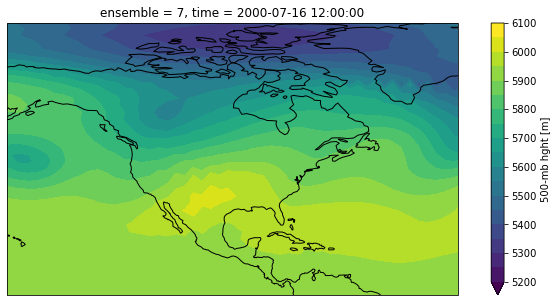

In [9]:
fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree()) #central_longitude=180

ds_max['h500'].plot.contourf(ax=ax,
                             transform=ccrs.PlateCarree(),
                             levels=np.arange(5200, 6150, 50),
                             )
#cbar_kwargs={'label': clim.units},
#                   cmap='viridis_r'
#
#extend='max',

ax.coastlines()
ax.set_extent([-160, -30, 5, 75])
plt.show()